# Capstone project - The Battle of Neighborhoods

### Applied Data Science Capstone by IBM, Coursera which is the sub-track of 'IBM Professional Data Science Certificate'  

## FYI: This is the notebook with code and full report consisting of all the part as recommended

### Table of Contents

1. [Business Problem](#BusinessProblem)
2. [Data](#Data)
3. [Methodology](#Methodology)
4. [Results](#Results)
5. [Discussion](#Discussion)
6. [Conclusion](#Conclusion)

### Business Problem <a name="BusinessProblem"></a> 


<j>The most trending, essential and leading business in most of the western countries and other is the food industry. The business case considered focusses on identifying suitable location for starting a <b>restaurant in the neighborhoods of Toronto city, Canada.</b> Toronto is the provincial capital of Ontario and the most populous city in Canada,with a population of 6,139,404 in 2019 and has been predicted to reach 6,491,286 in 2025 at the growth rate of 0.93%. Hence we will be focussing in Toronto city and its borough for this project.

According to the statistics provided by [CNBC report](https://www.cnbc.com/2016/01/20/heres-the-real-reason-why-most-restaurants-fail.html) , around <b>60%</b> of new restaurant fail within the first year and nearly <b>80%</b> shutter before fifth anniversary. The most common and <b>top reason</b> is the <b>location of the restaurant</b> and the lack of self-awareness about the business’s appropriate location.
To help identifying the right business location among many towns in Toronto city for starting the restaurant, this research project provides a <b>recommendation</b> considering various factors including but not limited to <b>analyzing venues in and around the neighborhoods of Toronto city</b>, comparing and providing the best and suitable place <b>nearby Toronto city, Canada</b> to start and establish the restaurant successfully!  

<b> Key Benefiters: </b> Business ventures, Entrepreneurs, Investors, Startups companies, Vendors etc.</j>

With the help of Data Science platform, necessary evaluations will be done for each neighborhoods based on certain criteria, to find the most popular and suitable business location helping the key benefiters to choose on their own. Thus, saving the time and efforts spent for data analysis, and <b>preventing the 60% to 80% of failing rate of restaurants! </b>  

## Data <a name="Data"></a> 

### Factors considered
For the analysis of considered problem statement, following are the factors addressed,

 <ul> 
    <li> Popular neighborhoods</li>
    <li> Statistics on population in neighborhoods</li>
    <li> Most interested venues</li></ul>

### Data extraction

<ul>
    <li>Primary data is extracted from Wikipedia,https://www.cnbc.com/2016/01/20/heres-the-real-reason-why-most-restaurants-fail.html</li>
    <li>Details of neighborhood is extracted using the Foursquare platform </li>
    <li>Population details are fetched from https://en.wikipedia.org/wiki/Demographics_of_Toronto_neighbourhoods</li>
    <li>Geospatial data is utilized from http://cocl.us/Geospatial_data</li>
    
</ul>

### Importing dependencies

In [107]:
#Dependencies
import requests
import pandas as pd
import numpy as np
import random
import matplotlib as mpl
import matplotlib.pyplot as plt

In [108]:
!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim

from IPython.display import Image
from IPython.core.display import HTML

from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium 

print('Folium,Geopy installed')
print('Dependencies imported')

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Folium,Geopy installed
Dependencies imported


#### Scraping the data and converting to dataframe

The necessary data related to postal codes of Canada is extracted from Wikipedia using the pandas library and converted to dataframe. This dataframe is then properly cleaned removing unnecessary data from it ensuring the following headers are included
<ul>
    <li>Postcodes</li>
    <li>Borough</li>
    <li>Neighborhood</li>
</ul>

In [109]:
#scraping the table from web using pandas
df = pd.read_html('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M', header=None)

In [110]:
df[0].head()

,Postcode,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront


In [111]:
df = df[0]
df

,Postcode,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M5A,Downtown Toronto,Regent Park
6,M6A,North York,Lawrence Heights
7,M6A,North York,Lawrence Manor
8,M7A,Queen's Park,Not assigned
9,M8A,Not assigned,Not assigned


### Removing unassigned borough from dataset

In [112]:
index = df[df['Borough']== 'Not assigned'].index
index
df.drop(index,inplace=True,index=None)
#Deleting unwanted row from dataframe and reset the index
df.reset_index(drop=True)

,Postcode,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,Harbourfront
3,M5A,Downtown Toronto,Regent Park
4,M6A,North York,Lawrence Heights
5,M6A,North York,Lawrence Manor
6,M7A,Queen's Park,Not assigned
7,M9A,Etobicoke,Islington Avenue
8,M1B,Scarborough,Rouge
9,M1B,Scarborough,Malvern


### Grouping Neighborhoods common to a borough


In [113]:
df1 = df
df1
df1.reset_index(drop=True)
df1=df1.groupby(['Postcode','Borough'],as_index=False).agg(','.join)

#Dataframe after grouping 
df1


,Postcode,Borough,Neighbourhood
0,M1B,Scarborough,"Rouge,Malvern"
1,M1C,Scarborough,"Highland Creek,Rouge Hill,Port Union"
2,M1E,Scarborough,"Guildwood,Morningside,West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,"East Birchmount Park,Ionview,Kennedy Park"
7,M1L,Scarborough,"Clairlea,Golden Mile,Oakridge"
8,M1M,Scarborough,"Cliffcrest,Cliffside,Scarborough Village West"
9,M1N,Scarborough,"Birch Cliff,Cliffside West"


### Processing the dataset 

Here, the unassigned neighborhood is assigned by a corresponding borough value

In [114]:
df1[df1['Neighbourhood']=='Not assigned']

,Postcode,Borough,Neighbourhood
85,M7A,Queen's Park,Not assigned


In [115]:
#Finding the index
index = df1[df1['Neighbourhood']=='Not assigned'].index
index

Int64Index([85], dtype='int64')

In [116]:
df1.loc[index,'Neighbourhood'] = df1.loc[index,'Borough']
df1.loc[index]



,Postcode,Borough,Neighbourhood
85,M7A,Queen's Park,Queen's Park


In [117]:
#Changes reflected
df1

,Postcode,Borough,Neighbourhood
0,M1B,Scarborough,"Rouge,Malvern"
1,M1C,Scarborough,"Highland Creek,Rouge Hill,Port Union"
2,M1E,Scarborough,"Guildwood,Morningside,West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,"East Birchmount Park,Ionview,Kennedy Park"
7,M1L,Scarborough,"Clairlea,Golden Mile,Oakridge"
8,M1M,Scarborough,"Cliffcrest,Cliffside,Scarborough Village West"
9,M1N,Scarborough,"Birch Cliff,Cliffside West"


In [118]:
print('Final processed dataset has total data of ',df1.shape)

Final processed dataset has total data of  (103, 3)


### Adding latitude and longitude

In [119]:
#Existing dataframe
df1_geo = df1
df1_geo

#Reading the geographical coordinates of each postal code from csv file
df_geo = pd.read_csv('http://cocl.us/Geospatial_data')
df_geo

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476
5,M1J,43.744734,-79.239476
6,M1K,43.727929,-79.262029
7,M1L,43.711112,-79.284577
8,M1M,43.716316,-79.239476
9,M1N,43.692657,-79.264848


#### Actual data in Geospatial information containing file

In [120]:
df_geo = df_geo[['Latitude','Longitude']]
df_geo.head()

,Latitude,Longitude
0,43.806686,-79.194353
1,43.784535,-79.160497
2,43.763573,-79.188711
3,43.770992,-79.216917
4,43.773136,-79.239476


### Adding geospatial data to existing dataframe

In [121]:
df1_geo = pd.concat([df1_geo,df_geo],axis=1)
df1_geo

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge,Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek,Rouge Hill,Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood,Morningside,West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476
6,M1K,Scarborough,"East Birchmount Park,Ionview,Kennedy Park",43.727929,-79.262029
7,M1L,Scarborough,"Clairlea,Golden Mile,Oakridge",43.711112,-79.284577
8,M1M,Scarborough,"Cliffcrest,Cliffside,Scarborough Village West",43.716316,-79.239476
9,M1N,Scarborough,"Birch Cliff,Cliffside West",43.692657,-79.264848


This dataset consist of all postal codes in Canada but for this project we will be focussing on the Toronto city. Hence removing other borough and its information

In [234]:
sub_string = "Toronto"

Toronto_data = df1_geo[df1_geo['Borough'].str.contains(sub_string)]
Toronto_data

,Postcode,Borough,Neighbourhood,Latitude,Longitude
37,M4E,East Toronto,The Beaches,43.676357,-79.293031
41,M4K,East Toronto,"The Danforth West,Riverdale",43.679557,-79.352188
42,M4L,East Toronto,"The Beaches West,India Bazaar",43.668999,-79.315572
43,M4M,East Toronto,Studio District,43.659526,-79.340923
44,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790
45,M4P,Central Toronto,Davisville North,43.712751,-79.390197
46,M4R,Central Toronto,North Toronto West,43.715383,-79.405678
47,M4S,Central Toronto,Davisville,43.704324,-79.388790
48,M4T,Central Toronto,"Moore Park,Summerhill East",43.689574,-79.383160
49,M4V,Central Toronto,"Deer Park,Forest Hill SE,Rathnelly,South Hill,...",43.686412,-79.400049


In [133]:
Toronto_data['Neighbourhood'].nunique()

38

In [123]:
print('Toronto data has the total record of ',Toronto_data.shape)

Toronto data has the total record of  (38, 5)


## Foursquare

Now the primary data is collected and created as dataframe. Using the Foursquare API, let us get the restaurants in the neighborhoods of Toronto city. As we are going to identity the best location for starting a restaurant the search will be sorting out the data with keyword 'restaurant' irrespective of types of restaurant.

In [ ]:
# The code was removed by Watson Studio for sharing.

In order to define an instance of the geocoder, we need to define a user_agent. We will name our agent <em>foursquare_agent</em>, as shown below. 

Since our focus is <b>Toronto city</b> which is the provincial capital of Ontario and the most populous city in Canada,the venue search for restaurants will be limited to Toronto city neighborhoods restricting the radius to 500 so that the distance between the Toronto city and neighborhoods are not too far

In [125]:
address = 'Toronto, ON, Canada'
geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.653963, -79.387207.


### Map 
Now let us create a map of canada using the folium library, plotted the borough of Toronto city superimposed on it, using the latitude and longitude of Toronto

<b> Toronto city</b>
<ul>
    <li> Latitude 43.653963</li>
    <li> Longitude -79.387207</li>
</ul>

In [126]:
# create map of Toronto using latitude and longitude values
map_Toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(df1_geo['Latitude'], df1_geo['Longitude'], df1_geo['Borough'], df1_geo['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Toronto)  
    
map_Toronto

Now cleaning the dataframe by sorting with Borough having Toronto as substring in the value

In [127]:
sub_string = "Toronto"

Toronto_data = df1_geo[df1_geo['Borough'].str.contains(sub_string)]
Toronto_data

,Postcode,Borough,Neighbourhood,Latitude,Longitude
37,M4E,East Toronto,The Beaches,43.676357,-79.293031
41,M4K,East Toronto,"The Danforth West,Riverdale",43.679557,-79.352188
42,M4L,East Toronto,"The Beaches West,India Bazaar",43.668999,-79.315572
43,M4M,East Toronto,Studio District,43.659526,-79.340923
44,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790
45,M4P,Central Toronto,Davisville North,43.712751,-79.390197
46,M4R,Central Toronto,North Toronto West,43.715383,-79.405678
47,M4S,Central Toronto,Davisville,43.704324,-79.388790
48,M4T,Central Toronto,"Moore Park,Summerhill East",43.689574,-79.383160
49,M4V,Central Toronto,"Deer Park,Forest Hill SE,Rathnelly,South Hill,...",43.686412,-79.400049


Now the dataframe has only borough with Toronto, as we are focussing on the location nearby Toronto city

In [134]:
Toronto_data['Borough'].nunique()

4

In [135]:
Toronto_data['Neighbourhood'].nunique()

38

## Key Note

From the above analysis we have observed the following,

<ul>
    <li>Out of 103 data, we refined it to 38 data collection having unique <b>38 Neighborhoods for 4 Borough</b> of Toronto city </li>

## Map superimposed with Toronto borugh

In [128]:
# create map of Toronto using latitude and longitude values
map_Toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(Toronto_data['Latitude'], Toronto_data['Longitude'], Toronto_data['Borough'], Toronto_data['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Toronto)  
    
map_Toronto

## Methodology <a name="Methodology"></a> 

This project objective is to recommend a suitable business location for starting a restaurant in neighborhoods of Toronto city, based on certain criteria. Analysis will be performed on the neighborhoods within 5km from the center of city.

<b>First stage</b>
<ul>
    <li> Required data - Postcodes | Borough | Neighborhood | Latitude | Longitude</li> 
    <li> Necessary processing and refining of primary data - where the data is refined to 38 Neighborhoods for 4 Borough of Toronto city</li>
</ul>
<b>Second stage</b>
<ul>
    <li><b>Exploration and identification of Venues</b> -
Venues in nearby neighborhood for the selected Borough will be identified using the <b>Foursquare API service</b>. Later, identifying the top 10 most common and resident's prefered venues inorder to identify which neighborhood prefers and are more interested in food and restaurants.  
                    </li>
    <li><b>Identifying Population rate for selected neighborhoods</b>- Here, we will be scraping the data from web and converting to dataframe using Pandas library. This will help us compare and analyze the data with our previous findings, in identification of suitable business location</li>

</ul>
<b>Final stage</b>
    <li><b>Algorithm to perform clustering</b>- K-Means clustering is performed to accurate our analysis and save the 60% to 80% of shut-off rate of restaurants due to location problem</li>
    
<b>Result</b>
From overall observation, analysis we will be able to provide a suggestion on suitable business location to key benefiters or target audiences to start their restaurant business and establish successfully

## Analysis of data

Now let us get the nearyby venues 

In [129]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)#### Explore def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [130]:
# type your answer here

Toronto_venues = getNearbyVenues(names= Toronto_data['Neighbourhood'],
                                   latitudes= Toronto_data['Latitude'],
                                   longitudes= Toronto_data['Longitude']
                                  )

The Beaches
The Danforth West,Riverdale
The Beaches West,India Bazaar
Studio District
Lawrence Park
Davisville North
North Toronto West
Davisville
Moore Park,Summerhill East
Deer Park,Forest Hill SE,Rathnelly,South Hill,Summerhill West
Rosedale
Cabbagetown,St. James Town
Church and Wellesley
Harbourfront,Regent Park
Ryerson,Garden District
St. James Town
Berczy Park
Central Bay Street
Adelaide,King,Richmond
Harbourfront East,Toronto Islands,Union Station
Design Exchange,Toronto Dominion Centre
Commerce Court,Victoria Hotel
Roselawn
Forest Hill North,Forest Hill West
The Annex,North Midtown,Yorkville
Harbord,University of Toronto
Chinatown,Grange Park,Kensington Market
CN Tower,Bathurst Quay,Island airport,Harbourfront West,King and Spadina,Railway Lands,South Niagara
Stn A PO Boxes 25 The Esplanade
First Canadian Place,Underground city
Christie
Dovercourt Village,Dufferin
Little Portugal,Trinity
Brockton,Exhibition Place,Parkdale Village
High Park,The Junction South
Parkdale,Roncesvall

In [131]:


#The size of the dataframe having the venues of Toronto Neighborhood
print(Toronto_venues.shape)
Toronto_venues.head()



(842, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,The Beaches,43.676357,-79.293031,Glen Manor Ravine,43.676821,-79.293942,Trail
1,The Beaches,43.676357,-79.293031,The Big Carrot Natural Food Market,43.678879,-79.297734,Health Food Store
2,The Beaches,43.676357,-79.293031,Grover Pub and Grub,43.679181,-79.297215,Pub
3,The Beaches,43.676357,-79.293031,Glen Stewart Ravine,43.676300,-79.294784,Other Great Outdoors
4,The Beaches,43.676357,-79.293031,Upper Beaches,43.680563,-79.292869,Neighborhood


In [31]:
Toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"Adelaide,King,Richmond",30,30,30,30,30,30
Berczy Park,30,30,30,30,30,30
"Brockton,Exhibition Place,Parkdale Village",22,22,22,22,22,22
Business Reply Mail Processing Centre 969 Eastern,19,19,19,19,19,19
"CN Tower,Bathurst Quay,Island airport,Harbourfront West,King and Spadina,Railway Lands,South Niagara",15,15,15,15,15,15
"Cabbagetown,St. James Town",30,30,30,30,30,30
Central Bay Street,30,30,30,30,30,30
"Chinatown,Grange Park,Kensington Market",30,30,30,30,30,30
Christie,16,16,16,16,16,16


In [32]:
print('There are {} uniques categories.'.format(len(Toronto_venues['Venue Category'].unique())))

There are 187 uniques categories.


## Key Note

From the above analysis,the following are observed

<ul>
    <li>we have refined to <b>187 unique categories</b> for <b>38 unique Neighborhoods for 4 Borough</b> of Toronto city</li> 
</ul>

In [33]:
# one hot encoding
Toronto_onehot = pd.get_dummies(Toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Toronto_onehot['Neighborhood'] = Toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Toronto_onehot.columns[-1]] + list(Toronto_onehot.columns[:-1])
Toronto_onehot = Toronto_onehot[fixed_columns]

Toronto_onehot.head()

,Yoga Studio,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Aquarium,Art Gallery,...,Theater,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
Toronto_onehot.shape

(842, 187)

In [35]:
toronto_grouped = Toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

,Neighborhood,Yoga Studio,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Aquarium,...,Theater,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop
0,"Adelaide,King,Richmond",0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.033333,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000
1,Berczy Park,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000
2,"Brockton,Exhibition Place,Parkdale Village",0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Business Reply Mail Processing Centre 969 Eastern,0.052632,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,"CN Tower,Bathurst Quay,Island airport,Harbourf...",0.000000,0.066667,0.066667,0.066667,0.066667,0.2,0.133333,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,"Cabbagetown,St. James Town",0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,Central Bay Street,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,"Chinatown,Grange Park,Kensington Market",0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000,0.066667,0.033333,0.000000
8,Christie,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,Church and Wellesley,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000


In [36]:
num_top_venues = 5

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adelaide,King,Richmond----
              venue  freq
0        Steakhouse  0.10
1             Hotel  0.07
2              Café  0.07
3       Coffee Shop  0.07
4  Asian Restaurant  0.07


----Berczy Park----
            venue  freq
0            Café  0.07
1        Beer Bar  0.07
2     Coffee Shop  0.07
3    Cocktail Bar  0.07
4  Farmers Market  0.07


----Brockton,Exhibition Place,Parkdale Village----
                   venue  freq
0         Breakfast Spot  0.09
1                   Café  0.09
2            Coffee Shop  0.09
3   Gym / Fitness Center  0.05
4  Performing Arts Venue  0.05


----Business Reply Mail Processing Centre 969 Eastern----
                venue  freq
0  Light Rail Station  0.11
1         Yoga Studio  0.05
2             Brewery  0.05
3                 Spa  0.05
4          Smoke Shop  0.05


----CN Tower,Bathurst Quay,Island airport,Harbourfront West,King and Spadina,Railway Lands,South Niagara----
              venue  freq
0   Airport Service  0.20
1  Airport Termin

In [37]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [51]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
toronto_neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
toronto_neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    toronto_neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

toronto_neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Adelaide,King,Richmond",Steakhouse,Café,Hotel,Asian Restaurant,Coffee Shop,Gastropub,Concert Hall,Pizza Place,Sushi Restaurant,Monument / Landmark
1,Berczy Park,Seafood Restaurant,Coffee Shop,Cocktail Bar,Beer Bar,Farmers Market,Café,Comfort Food Restaurant,Fish Market,Liquor Store,Bistro
2,"Brockton,Exhibition Place,Parkdale Village",Breakfast Spot,Café,Coffee Shop,Caribbean Restaurant,Burrito Place,Restaurant,Stadium,Bar,Italian Restaurant,Bakery
3,Business Reply Mail Processing Centre 969 Eastern,Light Rail Station,Yoga Studio,Spa,Garden Center,Gym / Fitness Center,Garden,Fast Food Restaurant,Farmers Market,Comic Shop,Park
4,"CN Tower,Bathurst Quay,Island airport,Harbourf...",Airport Service,Airport Terminal,Boat or Ferry,Coffee Shop,Sculpture Garden,Boutique,Harbor / Marina,Airport Lounge,Airport Gate,Airport Food Court
5,"Cabbagetown,St. James Town",Coffee Shop,Restaurant,Italian Restaurant,Café,Pet Store,Market,Sandwich Place,Butcher,Pub,Caribbean Restaurant
6,Central Bay Street,Coffee Shop,Bubble Tea Shop,Spa,Italian Restaurant,Café,Poke Place,Sandwich Place,Japanese Restaurant,Bar,Ramen Restaurant
7,"Chinatown,Grange Park,Kensington Market",Café,Vietnamese Restaurant,Comfort Food Restaurant,Vegetarian / Vegan Restaurant,Caribbean Restaurant,Bakery,Mexican Restaurant,Liquor Store,Bar,Farmers Market
8,Christie,Grocery Store,Café,Park,Convenience Store,Diner,Italian Restaurant,Baby Store,Restaurant,Athletics & Sports,Nightclub
9,Church and Wellesley,Gay Bar,Japanese Restaurant,Pub,Hobby Shop,Dance Studio,Ice Cream Shop,Indian Restaurant,Ethiopian Restaurant,Italian Restaurant,Ramen Restaurant


### Total neighborhood venues

Following above are the list of top 10 venues for each neighborhood

In [53]:
toronto_neighborhoods_venues_sorted.shape

(38, 11)

In [84]:
Total_venues = Toronto_venues.groupby('Neighborhood').count()
Total_venues

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"Adelaide,King,Richmond",30,30,30,30,30,30
Berczy Park,30,30,30,30,30,30
"Brockton,Exhibition Place,Parkdale Village",22,22,22,22,22,22
Business Reply Mail Processing Centre 969 Eastern,19,19,19,19,19,19
"CN Tower,Bathurst Quay,Island airport,Harbourfront West,King and Spadina,Railway Lands,South Niagara",15,15,15,15,15,15
"Cabbagetown,St. James Town",30,30,30,30,30,30
Central Bay Street,30,30,30,30,30,30
"Chinatown,Grange Park,Kensington Market",30,30,30,30,30,30
Christie,16,16,16,16,16,16


In [85]:
Total_venues.drop(columns =['Neighborhood Latitude', 'Neighborhood Longitude','Venue Latitude', 'Venue Longitude'],inplace=True)


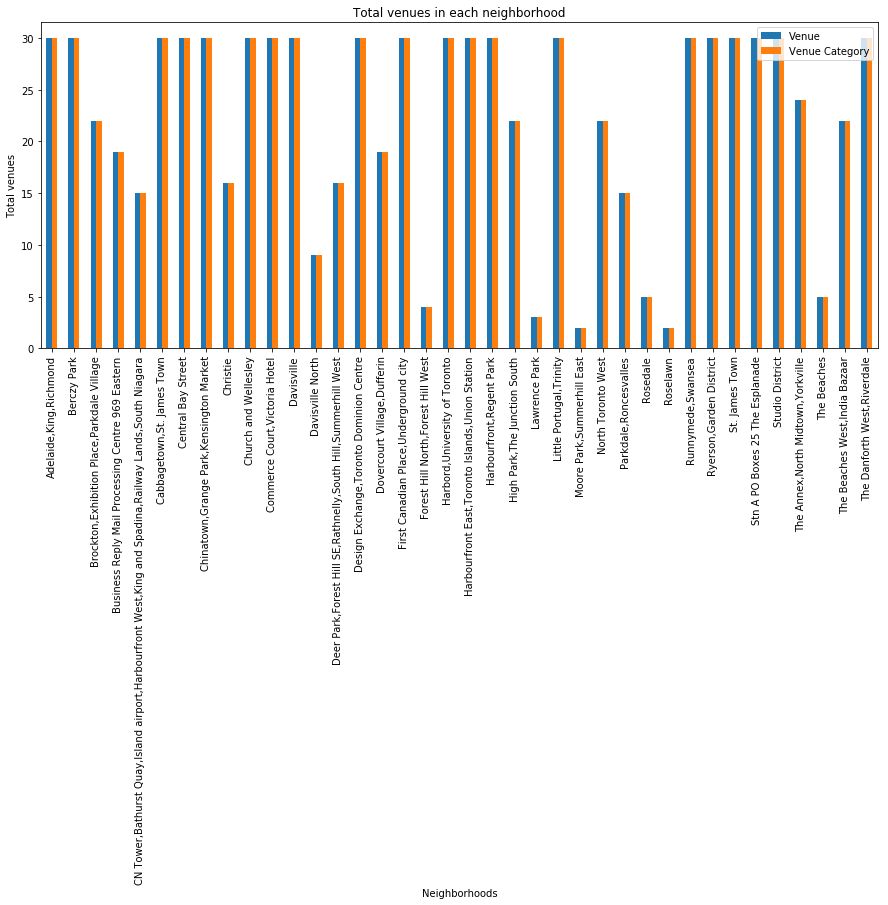

In [86]:
Total_venues.plot(kind='bar', figsize=(15, 6))

plt.xlabel('Neighborhoods') # add to x-label to the plot
plt.ylabel('Total venues') # add y-label to the plot
plt.title('Total venues in each neighborhood') # add title to the plot

plt.show()

### Neighborhoods having maximum venues 

In [91]:
neighborhood_more_venue = Total_venues[Total_venues['Venue'].values>=30]

In [92]:
neighborhood_more_venue

,Venue,Venue Category
Neighborhood,,
"Adelaide,King,Richmond",30,30
Berczy Park,30,30
"Cabbagetown,St. James Town",30,30
Central Bay Street,30,30
"Chinatown,Grange Park,Kensington Market",30,30
Church and Wellesley,30,30
"Commerce Court,Victoria Hotel",30,30
Davisville,30,30
"Design Exchange,Toronto Dominion Centre",30,30


In [93]:
neighborhood_more_venue.shape

(20, 2)

## Clustering

In [140]:
# import k-means from clustering stage
from sklearn.cluster import KMeans
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

In [142]:
# set number of clusters
kclusters = 5

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [143]:
# add clustering labels
toronto_neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = Toronto_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(toronto_neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighbourhood')

toronto_merged.head() # check the last columns!



,Postcode,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
37,M4E,East Toronto,The Beaches,43.676357,-79.293031,0,Other Great Outdoors,Trail,Health Food Store,Pub,Wine Shop,Creperie,Eastern European Restaurant,Dog Run,Discount Store,Diner
41,M4K,East Toronto,"The Danforth West,Riverdale",43.679557,-79.352188,0,Greek Restaurant,Ice Cream Shop,Italian Restaurant,Yoga Studio,Pizza Place,Cosmetics Shop,Pub,Restaurant,Dessert Shop,Diner
42,M4L,East Toronto,"The Beaches West,India Bazaar",43.668999,-79.315572,0,Park,Sandwich Place,Gym,Sushi Restaurant,Pet Store,Pizza Place,Movie Theater,Pub,Burrito Place,Burger Joint
43,M4M,East Toronto,Studio District,43.659526,-79.340923,0,Café,Coffee Shop,American Restaurant,Italian Restaurant,Bakery,Cheese Shop,Coworking Space,Chinese Restaurant,Fish Market,Middle Eastern Restaurant
44,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790,3,Bus Line,Park,Swim School,Creperie,Eastern European Restaurant,Dog Run,Discount Store,Diner,Dessert Shop,Deli / Bodega


In [146]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighbourhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Examine clusters

### Cluster 1

In [226]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
37,East Toronto,0,Other Great Outdoors,Trail,Health Food Store,Pub,Wine Shop,Creperie,Eastern European Restaurant,Dog Run,Discount Store,Diner
41,East Toronto,0,Greek Restaurant,Ice Cream Shop,Italian Restaurant,Yoga Studio,Pizza Place,Cosmetics Shop,Pub,Restaurant,Dessert Shop,Diner
42,East Toronto,0,Park,Sandwich Place,Gym,Sushi Restaurant,Pet Store,Pizza Place,Movie Theater,Pub,Burrito Place,Burger Joint
43,East Toronto,0,Café,Coffee Shop,American Restaurant,Italian Restaurant,Bakery,Cheese Shop,Coworking Space,Chinese Restaurant,Fish Market,Middle Eastern Restaurant
45,Central Toronto,0,Gym,Breakfast Spot,Hotel,Food & Drink Shop,Dance Studio,Park,Restaurant,Sandwich Place,Clothing Store,Aquarium
46,Central Toronto,0,Coffee Shop,Clothing Store,Sporting Goods Shop,Yoga Studio,Diner,Salon / Barbershop,Spa,Burger Joint,Restaurant,Italian Restaurant
47,Central Toronto,0,Dessert Shop,Gym,Sandwich Place,Café,Pizza Place,Coffee Shop,Sushi Restaurant,Italian Restaurant,Diner,Seafood Restaurant
49,Central Toronto,0,Pub,Coffee Shop,Fried Chicken Joint,Sushi Restaurant,Bagel Shop,Sports Bar,Restaurant,Health & Beauty Service,American Restaurant,Pizza Place
51,Downtown Toronto,0,Coffee Shop,Restaurant,Italian Restaurant,Café,Pet Store,Market,Sandwich Place,Butcher,Pub,Caribbean Restaurant
52,Downtown Toronto,0,Gay Bar,Japanese Restaurant,Pub,Hobby Shop,Dance Studio,Ice Cream Shop,Indian Restaurant,Ethiopian Restaurant,Italian Restaurant,Ramen Restaurant


### Cluster 2

In [227]:


toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]



,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
48,Central Toronto,1,Playground,Tennis Court,Creperie,Ethiopian Restaurant,Eastern European Restaurant,Dog Run,Discount Store,Diner,Dessert Shop,Deli / Bodega


### Cluster 3

In [229]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
63,Central Toronto,2,Pool,Garden,Wine Shop,Coworking Space,Eastern European Restaurant,Dog Run,Discount Store,Diner,Dessert Shop,Deli / Bodega


### Cluster 4

In [230]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
44,Central Toronto,3,Bus Line,Park,Swim School,Creperie,Eastern European Restaurant,Dog Run,Discount Store,Diner,Dessert Shop,Deli / Bodega


### Cluster 5

In [231]:


toronto_merged.loc[toronto_merged['Cluster Labels'] == 4, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]



,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
50,Downtown Toronto,4,Park,Playground,Trail,Building,Coworking Space,Dog Run,Discount Store,Diner,Dessert Shop,Deli / Bodega
64,Central Toronto,4,Park,Jewelry Store,Trail,Sushi Restaurant,Wine Shop,Cuban Restaurant,Eastern European Restaurant,Dog Run,Discount Store,Diner


### Scraping the population information from web

In [202]:
#scraping the table from web using pandas
df_pop = pd.read_html('https://en.wikipedia.org/wiki/Demographics_of_Toronto_neighbourhoods', header=None)

In [203]:
df_pop[1].head()

,Name,FM,Census Tracts,Population,Land area (km2),Density (people/km2),% Change in Population since 2001,Average Income,Transit Commuting %,% Renters,Second most common language (after English) by name,Second most common language (after English) by percentage,Map
0,Toronto CMA Average,NaN,All,5113149,5903.63,866,9.0,40704,10.6,11.4,NaN,NaN,NaN
1,Agincourt,S,"0377.01, 0377.02, 0377.03, 0377.04, 0378.02, 0...",44577,12.45,3580,4.6,25750,11.1,5.9,Cantonese (19.3%),19.3% Cantonese,NaN
2,Alderwood,E,"0211.00, 0212.00",11656,4.94,2360,-4.0,35239,8.8,8.5,Polish (6.2%),06.2% Polish,NaN
3,Alexandra Park,OCoT,0039.00,4355,0.32,13609,0.0,19687,13.8,28.0,Cantonese (17.9%),17.9% Cantonese,NaN
4,Allenby,OCoT,0140.00,2513,0.58,4333,-1.0,245592,5.2,3.4,Russian (1.4%),01.4% Russian,NaN


We have identified 20 neighborhoods for starting a business. Now, let us consider the population in each selected neighborhoods 

In [204]:
df_pop=df_pop[1]

In [205]:
df_pop_refined=pd.DataFrame(df_pop['Name'])

In [206]:
df_pop_refined=pd.concat([df_pop_refined,df_pop['Population']],axis=1)

In [207]:
df_pop_refined

,Name,Population
0,Toronto CMA Average,5113149
1,Agincourt,44577
2,Alderwood,11656
3,Alexandra Park,4355
4,Allenby,2513
5,Amesbury,17318
6,Armour Heights,4384
7,Banbury,6641
8,Bathurst Manor,14945
9,Bay Street Corridor,4787


In [208]:
df_pop_sel_neigh = df_pop_refined[df_pop_refined['Name'].isin([
    'Adelaide', 'King', 'Richmond',
    'Berczy Park',
    'Cabbagetown','St. James Town',
    'Central Bay Street',
    'Chinatown','Grange Park','Kensington Market',
    'Church and Wellesley',
    'Commerce Court','Victoria Hotel',
    'Davisville',
    'Design Exchange','Toronto Dominion Centre',
    'First Canadian Place','Underground city',
    'Harbord','University of Toronto',
    'Harbourfront East','Toronto Islands','Union Station',
    'Harbourfront','Regent Park',
    'Little Portugal','Trinity',
    'Runnymede','Swansea',
    'Ryerson','Garden District',
    'St. James Town',
    'Stn A PO Boxes 25 The Esplanade',
    'Studio District',
    'The Danforth West','Riverdale'
]) ]

In [209]:
df_pop_sel_neigh_high

,Name,Population
20,Cabbagetown,11120
27,Church and Wellesley,13397
36,Davisville,23727
58,Garden District,8240
61,Grange Park,9007
83,Kensington Market,3740
95,Little Portugal,5013
127,Riverdale,31007
133,Runnymede,4382
141,St. James Town,14666


In [210]:
df_pop_sel_neigh_high.reset_index(drop=True)

,Name,Population
0,Cabbagetown,11120
1,Church and Wellesley,13397
2,Davisville,23727
3,Garden District,8240
4,Grange Park,9007
5,Kensington Market,3740
6,Little Portugal,5013
7,Riverdale,31007
8,Runnymede,4382
9,St. James Town,14666


In [211]:
df_pop_sel_neigh_high.sort_values(by='Population', ascending=False)

,Name,Population
127,Riverdale,31007
36,Davisville,23727
141,St. James Town,14666
27,Church and Wellesley,13397
145,Swansea,11133
20,Cabbagetown,11120
61,Grange Park,9007
58,Garden District,8240
95,Little Portugal,5013
133,Runnymede,4382


In [220]:
df_pop_sel_neigh_high=df_pop_sel_neigh_high.reset_index(drop=True)
df_pop_sel_neigh_high

,Name,Population
0,Cabbagetown,11120
1,Church and Wellesley,13397
2,Davisville,23727
3,Garden District,8240
4,Grange Park,9007
5,Kensington Market,3740
6,Little Portugal,5013
7,Riverdale,31007
8,Runnymede,4382
9,St. James Town,14666


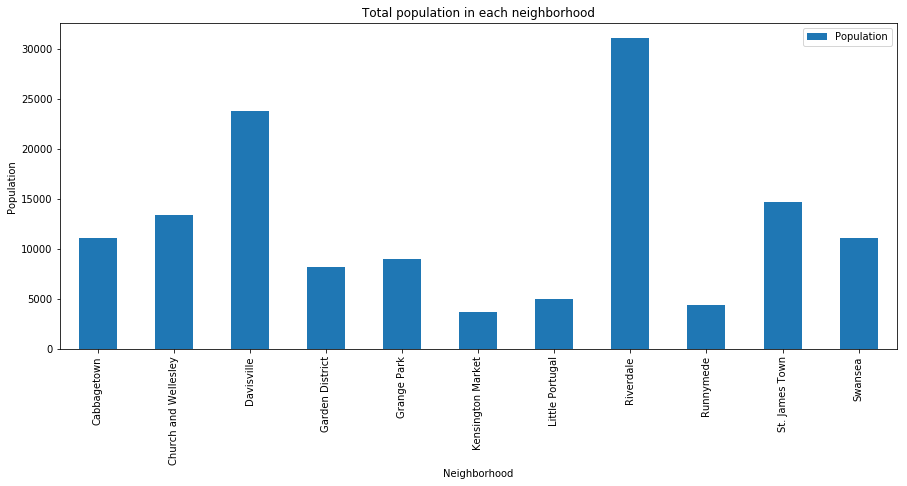

In [222]:
df_pop_sel_neigh_high.set_index('Name').plot(kind='bar', figsize=(15, 6))

plt.xlabel('Neighborhood') # add to x-label to the plot
plt.ylabel('Population') # add y-label to the plot
plt.title('Total population in each neighborhood') # add title to the plot

plt.show()

### Key Note

From the analysis,

The most populated neighborhood is <b>Riverdale</b>. Also, if we retrieve the most common venue in Riverdale it is found that <b> people are more interested in 'restaurants' comparing to other neighborhoods</b>. Hence this 'Riverdale' might be a good choice to start a restaurant considering the following criteria
    
<ul>
<li>Venue interest of people residing in the Riverdale</li>
<li>Population rate</li>
<li>Clustering</li>
</ul>


In [224]:
toronto_neighborhoods_venues_sorted[toronto_neighborhoods_venues_sorted['Neighborhood']== 'The Danforth West,Riverdale']

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
37,0,"The Danforth West,Riverdale",Greek Restaurant,Ice Cream Shop,Italian Restaurant,Yoga Studio,Pizza Place,Cosmetics Shop,Pub,Restaurant,Dessert Shop,Diner


## Result - Analysis outcome <a name="Result"></a> 



## Initial outcome

From the above analysis, following are the observations

Total records received - 103 data

Post refining - 38 unique Neighborhoods | 4 Borough of Toronto city | 187 unique categories 

Final refining - 20 Neighborhoods has more venues which was reduced from 38 previously

<b> Following are the neighborhood suggested for starting the restaurant business as these neighborhoods have the more venues which may be challenging but yet it clearly shows the high opportunity rate for starting the business</b>

<ol>
    <li>Adelaide,King,Richmond</li>
    <li>Berczy Park</li>
    <li>Cabbagetown,St. James Town</li>
    <li>Central Bay Street</li>
    <li>Chinatown,Grange Park,Kensington Market</li>
    <li>Church and Wellesley</li>
    <li>Commerce Court,Victoria Hotel</li>
    <li>Davisville</li>
    <li>Design Exchange,Toronto Dominion Centre</li>
    <li>First Canadian Place,Underground city</li>
    <li>Harbord,University of Toronto</li>
    <li>Harbourfront East,Toronto Islands,Union Station</li>
    <li>Harbourfront,Regent Park</li>
    <li>Little Portugal,Trinity</li>
    <li>Runnymede,Swansea</li>
    <li>Ryerson,Garden District</li>
    <li>St. James Town</li>
    <li>Stn A PO Boxes 25 The Esplanade</li>
    <li>Studio District</li>
    <li>The Danforth West,Riverdale</li>	
</ol> 



## Discussion and Recommendations <a name="Discussion"></a>

After further research, following are the result obtained,

The most populated neighborhood is <b>Riverdale</b>. Also, if we retrieve the most common venue in Riverdale it is found that <b> people are more interested in 'restaurants' comparing to other neighborhoods</b>. Hence this 'Riverdale' might be a good choice to start a restaurant from the analysis performed based on the following criteria
    
<ul>
<li>Venue interest of people residing in the Riverdale</li>
<li>Population rate</li>
<li>Clustering</li>
</ul>

<b>As per the outcome of this research, 'Riverdale' is most suitable for our business purpose. However, this research can be taken forward by considering the proximity of location with tourists spots, educational centers and further more criteria. Also, if the target auidence are opting to purchase on property then we can consider including the property values in each neighborhoods for further analysis. </b>  


## Conclusion  <a name="Conclusion"></a> 


The purpose of this project is to recommend a suitable business location for starting a restaurant in the neighborhoods of Toronto city, Ontorio, Canada. All the required data were collection through web scraping method and Foursquare API for venue informations. The analysis was based on the three criteria, population of neighborhood (which is more essential to determine and evaluate the earning capability and opportunity available in that neighborhood, most common or resident's preferred venues (this is to understand the interest domain of the people living in each neighborhood, this surely helps us to understand the potential impact it may create after the establishment), clustering (for more accurate results and further options in neighborhoods enabling the target audience to choose from the same).

As per the outcome of this research, 'Riverdale' is most suitable for our business purpose. However, this research can be taken forward by considering the proximity of location with tourists spots, educational centers and further more criteria. Also, if the target auidence are opting to purchase on property then we can consider including the property values in each neighborhoods for further analysis.   